In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 0,6

In [2]:
dataset = pd.read_csv("AirPassengers.csv")
# Parse string to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexed_data = dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexed_data.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


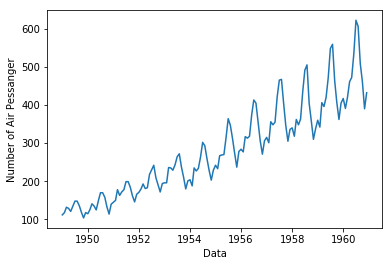

In [4]:
# Plot graph
plt.xlabel("Data")
plt.ylabel("Number of Air Pessanger")
plt.plot(indexed_data)

In [5]:
# Determining the rolling statistics
rolmean = indexed_data.rolling(window=12).mean()
rolstd = indexed_data.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

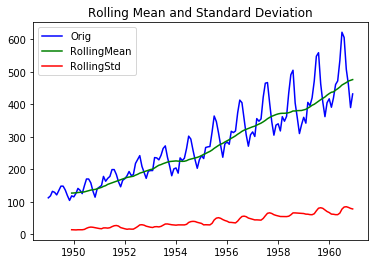

In [6]:
# Plot rolling statistics
orig = plt.plot(indexed_data,color='blue', label="Orig")
mean = plt.plot(rolmean, color='green', label='RollingMean')
std = plt.plot(rolstd, color='red', label='RollingStd')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [7]:
# Perform Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-fuller test:")
dftest = adfuller(indexed_data['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation used'])

for key,value in dftest[4].items():
    dfoutput["Critical Values (%s)"%key] = value
    
print(dfoutput)

Results of Dickey-fuller test:
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation used    130.000000
Critical Values (1%)           -3.481682
Critical Values (5%)           -2.884042
Critical Values (10%)          -2.578770
dtype: float64


1. p-value >0.05, so we cannot reject null hypothesis.  
2. Critical value and Test Statistics are not similar. 
##### Hence, Data is not stationary


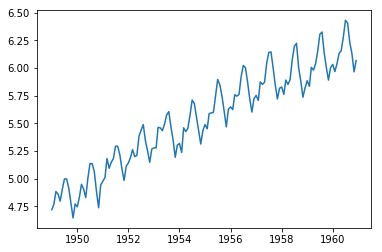

In [8]:
# Estimating the trend
indexed_data_logscale = np.log(indexed_data)
plt.plot(indexed_data_logscale)

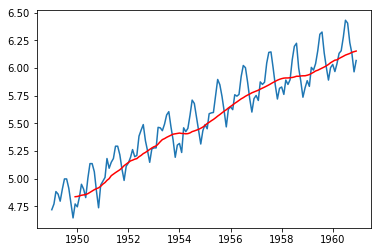

In [9]:
movingAverage = indexed_data_logscale.rolling(window=12).mean()
movingSTD = indexed_data_logscale.rolling(window=12).std()
plt.plot(indexed_data_logscale)
plt.plot(movingAverage,color='red')

In [10]:
datasetLogScaleMinusMovingAverage = indexed_data_logscale- movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# removing NA values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


### As we need to perform rolling statistics and dickey-fuller test again and again. So developing the function for the same.

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining the rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries,color='blue', label="Orig")
    mean = plt.plot(rolmean, color='black', label='RollingMean')
    std = plt.plot(rolstd, color='red', label='RollingStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-fuller test
    print("Results of Dickey-fuller test:")
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation used'])
    for key,value in dftest[4].items():
        dfoutput["Critical Values (%s)"%key] = value
    print(dfoutput)
    

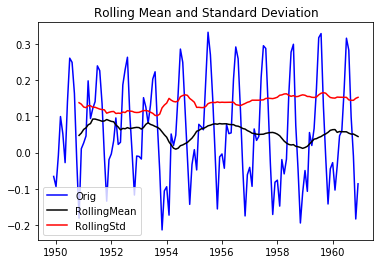

Results of Dickey-fuller test:
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation used    119.000000
Critical Values (1%)           -3.486535
Critical Values (5%)           -2.886151
Critical Values (10%)          -2.579896
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

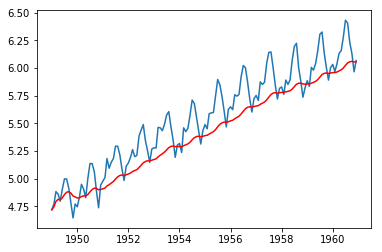

In [13]:
exponentialWeightedAverage = indexed_data_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_data_logscale)
plt.plot(exponentialWeightedAverage,color='red')

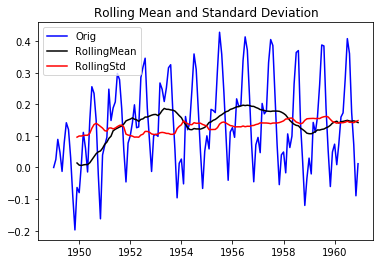

Results of Dickey-fuller test:
Test Statistics                -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observation used    130.000000
Critical Values (1%)           -3.481682
Critical Values (5%)           -2.884042
Critical Values (10%)          -2.578770
dtype: float64


In [14]:
DatasetLogScaleMinusexponentialWeightedAverage = indexed_data_logscale - exponentialWeightedAverage
test_stationarity(DatasetLogScaleMinusexponentialWeightedAverage)

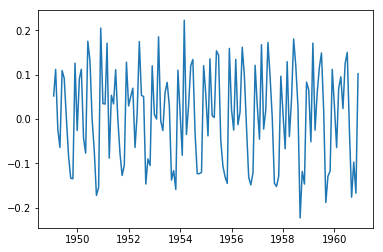

In [15]:
datasetLogDiffShifting = indexed_data_logscale - indexed_data_logscale.shift()
plt.plot(datasetLogDiffShifting)

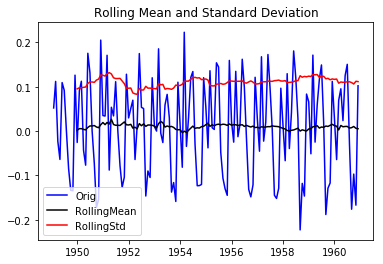

Results of Dickey-fuller test:
Test Statistics                -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation used    128.000000
Critical Values (1%)           -3.482501
Critical Values (5%)           -2.884398
Critical Values (10%)          -2.578960
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

#### You can see that ouput is really flat. Rejecting null hypothesis. Stationarity is there !

## Let's focus on components of time-series now

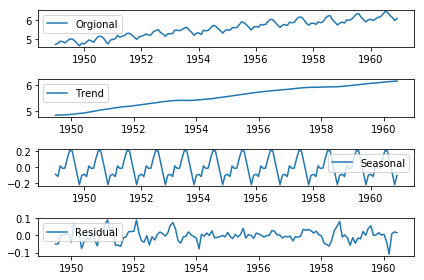

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_data_logscale, label='Orgional')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

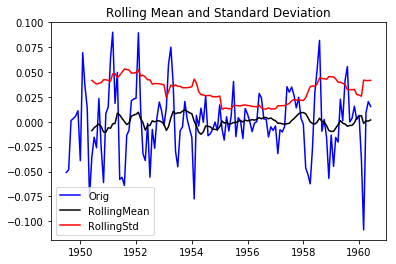

Results of Dickey-fuller test:
Test Statistics              -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observation used    1.220000e+02
Critical Values (1%)         -3.485122e+00
Critical Values (5%)         -2.885538e+00
Critical Values (10%)        -2.579569e+00
dtype: float64


In [18]:
# Check noise
decompomposedLogData = residual
decompomposedLogData.dropna(inplace=True)
test_stationarity(decompomposedLogData)

In [ ]:
# ACF and PACF Plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color='gray')
#plt.axhline(y= -1.96/np.sqrt(datasetLogDiffShifting), linestyle="--", color='gray')
#plt.axhline(y=1.96/np.sqrt(datasetLogDiffShifting), linestyle="--", color='gray')
plt.title("Autocorrelation Function")

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color='gray')
#plt.axhline(y=-1.96/np.sqrt(datasetLogDiffShifting), linestyle="--", color='gray')
#plt.axhline(y=1.96/np.sqrt(datasetLogDiffShifting), linestyle="--", color='gray')
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

#### AR Model

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


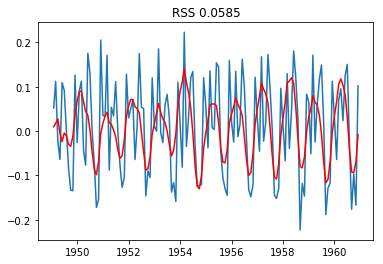

In [29]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(indexed_data_logscale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers']))**2)
print("Plotting AR Model")

#### MA Model

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


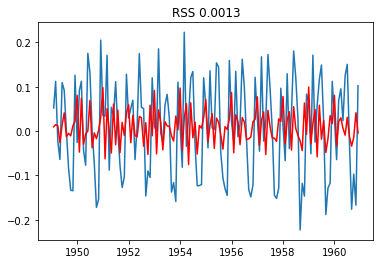

In [30]:
# MA model
model = ARIMA(indexed_data_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers']))**2)
print("Plotting MA Model")

#### ARIMA Model

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


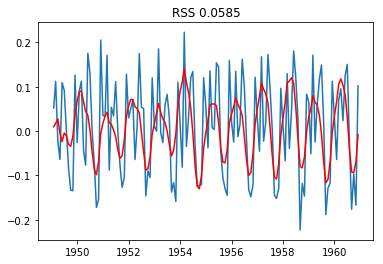

In [31]:
# ARIMA model
model = ARIMA(indexed_data_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS %.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers']))**2)
print("Plotting ARIMA Model")

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head(5))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [33]:
# Convering to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(indexed_data_logscale['#Passengers'].ix[0], index=indexed_data_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

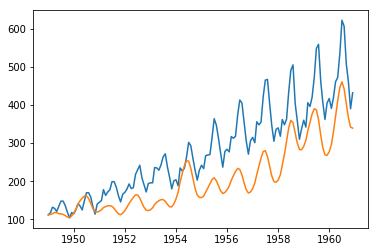

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_data)
plt.plot(predictions_ARIMA)

In [36]:
indexed_data_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


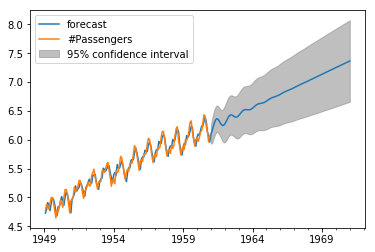

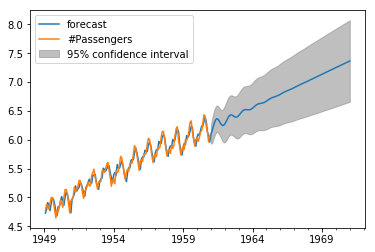

In [37]:
results_ARIMA.plot_predict(1,264)

In [38]:
x=results_ARIMA.forecast(steps=120)
x[1]

array([0.08384711, 0.10749463, 0.11568696, 0.11702776, 0.11703498,
       0.11744019, 0.11762251, 0.11778715, 0.12024164, 0.12736043,
       0.13870961, 0.15118795, 0.16157816, 0.16834397, 0.17177331,
       0.17311983, 0.17358733, 0.1738546 , 0.17430217, 0.17543331,
       0.17788147, 0.18195722, 0.18726218, 0.19283395, 0.19769247,
       0.20130641, 0.20369057, 0.20519833, 0.20625269, 0.20720999,
       0.20836971, 0.21000326, 0.21229744, 0.21524478, 0.21860179,
       0.22198257, 0.22503065, 0.22755295, 0.22954807, 0.23114798,
       0.23253824, 0.23390533, 0.23541309, 0.2371831 , 0.23926536,
       0.24161537, 0.2441037 , 0.24656356, 0.24885255, 0.25089628,
       0.25269732, 0.25431626, 0.2558431 , 0.25737225, 0.25898387,
       0.26072847, 0.26261545, 0.26461087, 0.26664896, 0.26865478,
       0.27056846, 0.27236094, 0.27403698, 0.2756277 , 0.27717826,
       0.27873523, 0.28033587, 0.28200014, 0.28372678, 0.28549506,
       0.28727206, 0.28902341, 0.29072332, 0.29236078, 0.29394

 # AR, MA, ARIMA Done !
